# Práctica 1 - Aprendizaje Automático Búsqueda Iterativa de Óptimos y Regresión Lineal

Límite de entrega: 3 de Abril de 2022 a las 23:59 (PRADO)\
Valoración máxima: 12 puntos (+2 puntos de Bonus)

Es obligatorio presentar un informe con las valoraciones y decisiones adoptadas en el desarrollo de cada uno de
los apartados. En dicho informe se incluirán los gráficos generados. También deberá incluirse una valoración sobre la
calidad de los resultados encontrados. Sin este informe se considera que el trabajo NO ha sido presentado. El informe debe estar integrado en este mismo cuaderno
(intercalando texto, código y resultados).

- <font color=red size=5>APELLIDOS: PERTÍÑEZ PEREA</font>
- <font color=red size=5>NOMBRE: FRANCISCO</font>
- <font color=red size=5>GRUPO DE PRÁCTICAS: 2</font>

<font size = 5>**1. EJERCICIO SOBRE LA BÚSQUEDA ITERATIVA DE  ÓPTIMOS (6.5 puntos)**</font>

<font color = Sienna size= 4>EJERCICIO.1.1:  1 punto.\
 Implementar el algoritmo de gradiente descendente.</font>

<font color = DarkCyan>Lo primero que debemos de hacer es definir las importaciones de librerías que necesitamos. Ademas inicializaremos una semilla de números aleatorios que posteriormente utilizaremos.</font>

In [118]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt


np.random.seed(1)

<font color = DarkCyan>Ahora si, vamos a crear una función que implemente el algorítmo de descenso de gradiente:</font>

In [119]:
"""
Funcion que implementa el algorítmo de descenso de gradiente

Parámetros:
    - w: vector de pesos.
    - lr: tasa de aprendizaje
    - grad_fun: gradiente de la funcion a aplicar.
    - fun: función a la que se le va a aplicar el algorítmo
    - epsilon: error_máximo
    - max_iter: máximo de iteraciones

Return: 
    - w: coordenadas del mínimo local encontrado.
    - iterations: número de iteraciones que ha hecho el algoritmo.
    - coodenates: vector con los puntos que ha ido calculando el algoritmo hasta llegar a la
      solución
"""
def gradient_descentE(w, lr, grad_fun, fun, epsilon, max_iters):
  iterations = 0 # iteraciones
  coordenates = [] # vector con las coordenadas que va tomando el punto
  
  # mientras el error sea mayor que el maximo permitido y no se haya pasado del máximo de iteraciones posibles
  while(abs(fun(w[0], w[1])) > epsilon and iterations < max_iters): 
    iterations += 1

    # actualizar w
    w = w - lr * grad_fun(w)

    # guardar valor de w en dicha iteración
    coordenates.append([w[0],w[1]])

  return w, iterations, np.array(coordenates)

<font color = Sienna size= 4>EJERCICIO.1.2: 2 puntos\
 Considerar la función $E(u, v) = (uve^{(−u^2−v^2)})^2$. Usar gradiente descendente para
encontrar un mınimo de esta función, comenzando desde el punto $(u, v) = (0.5, -0.5)$ y usando
una tasa de aprendizaje $\lambda = 0.1$.\
**a**) Calcular analíticamente y mostrar la expresión del gradiente de la función $E(u, v)$.\
**b**) ¿Cuántas iteraciones tarda el algoritmo en obtener por primera vez un valor de $E(u, v)$ inferior a $10^{−8}$.\
**c**) ¿En qué coordenadas $(u, v)$ se alcanzó por primera vez un valor igual o menor que $10^{-8}$ en el apartado anterior</font>


<font color = DarkCyan> Para resolver el apartado **a)** En primer lugar implementamos una función que defina la función E, siendo esta:</font>

- <font size=5 color = blue>$E(u, v) = (uve^{(−u^2−v^2)})^2$</blue>

In [120]:
"""
Función que implementa la aplicación de la función E

Parámetros:
  - u: primer parámetro del que depende E.
  - v: segundo parámetro del que depende E.

Return: retorna el valor que nos devuelve E al aplicarle los parámetros.
"""
def E(u,v):
    return (u*v*np.exp(-u**2-v**2))**2

<font color = DarkCyan>En segundo lugar implementamos las derivadas parciales de E respecto de u y v, es decir dos derivadas parciales, estas son:</font>

- <font size = 5 color = blue> $ \frac{\partial E}{\partial u} = 2uv^2 e^{2(−v^2−u^2)}- 4 u^3 v^2 e^{2(−v^2−u^2)} $</font>


- <font size = 5 color = blue> $ \frac{\partial E}{\partial v} = 2u^2v e^{2(−v^2−u^2)}- 4 u^2 v^3 e^{2(−v^2−u^2)} $</font>

In [121]:
"""
Función que implementa la aplicación de dEu

Parámetros:
  - u: primer parámetro del que depende E.
  - v: segundo parámetro del que depende E.

Return: retorna el valor que nos devuelve dEu al aplicarle los parámetros.
"""
def dEu(u,v):
  return 2*u * v**2 * np.exp(2 * (-v**2 - u**2)) - 4*u**3 * v**2 * np.exp(2 * (-v**2 - u**2))

"""
Función que implementa la aplicación de dEv

Parámetros:
  - u: primer parámetro del que depende E.
  - v: segundo parámetro del que depende E.

Return: retorna el valor que nos da dEv al aplicarle los parámetros.
"""
def dEv(u,v):
  return 2*u**2 * v * np.exp(2 * (-v**2 - u**2)) - 4*u**2 * v**3 * np.exp(2 * (-v**2 - u**2))

<font color = DarkCyan>Teniendo las dos derivadas parciales ahora ya podemos hacer la funcion que implementa el gradiente, siendo la expresión de este:</font>

-  <font size = 5 color = blue>$\nabla E = [\frac{\partial E}{\partial u}, \frac{\partial E}{\partial v}]$</font>

In [122]:
"""
Funcion que implementa el gradiente de E

Parámetros:
  - u: primera coordenada en el punto.
  - v: segunda coordenada en el punto.

Return: retorna el valor del gradiente en el punto pasado como parámetros.
"""
def gradE(w):
  return np.array([dEu(w[0],w[1]), dEv(w[0],w[1])])

<font color = DarkCyan>Finalmente con todo lo que hemos implementado podemos poner en marcha el algoritmo con los requisitos que se dan en el enunciado:</font>

- **Punto inicial = (0.5, -0.5)**
- **Tasa de aprendizaje = 0.1**
- **Máximo error = 1e-8**

<font color = DarkCyan>Se le ha puesto un maximo de iteraciones de 100000 para que termine su ejecución por llegar llegar al máximo error permitido en vez de por llegar al máximo de iteraciones.</font>

In [123]:
# configuracion de parámetros
eta = 0.1
maxIter = 100000
error2get = 1e-8
initial_point = np.array([0.5,-0.5],np.float64)

w, it, coordenates = gradient_descentE(initial_point, eta, gradE, E, error2get, maxIter)

print('Numero de iteraciones: ', it)
print('Coordenadas obtenidas: (', w[0], ', ', w[1],')')
print('Error obtenido: ', E(w[0],w[1]))


Numero de iteraciones:  25117
Coordenadas obtenidas: ( 0.010000842574554563 ,  -0.010000842574554563 )
Error obtenido:  9.99936950202903e-09


<font color = DarkCyan>Comprobamos que el comportamiento del algoritmo sea el correcto dibujando un gráfico que muestra la función y los pasos que ha dado el algoritmo para alcanzar el mínimo local encontrado:</font>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


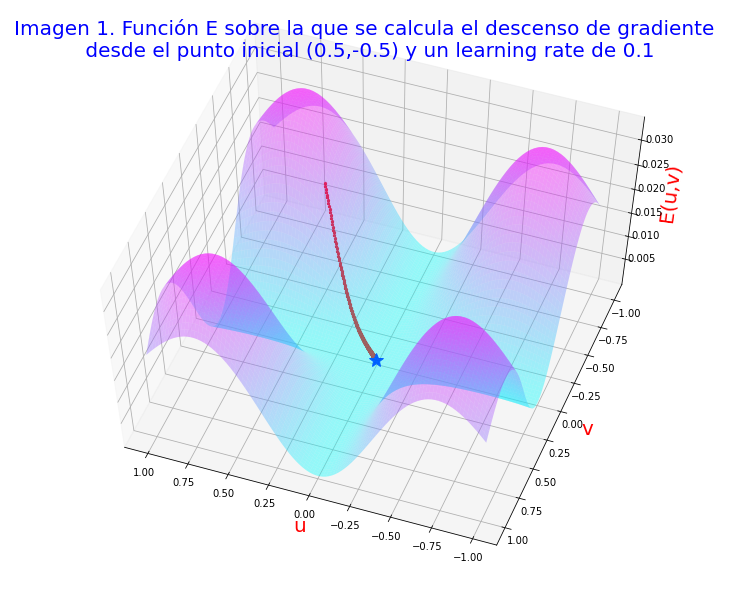

In [124]:
'''
Esta función muestra una figura 3D con la función a optimizar junto con el
óptimo encontrado y la ruta seguida durante la optimización. Esta función, al igual
que las otras incluidas en este documento, sirven solamente como referencia y
apoyo a los estudiantes. No es obligatorio emplearlas, y pueden ser modificadas
como se prefiera.
    rng_val: rango de valores a muestrear en np.linspace()
    fun: función a optimizar y mostrar
    ws: conjunto de pesos (pares de valores [x,y] que va recorriendo el optimizador
                           en su búsqueda iterativa del óptimo)
    colormap: mapa de color empleado en la visualización
    title_fig: título superior de la figura

Ejemplo de uso: display_figure(2, E, ws, 'plasma','Ejercicio 1.2. Función sobre la que se calcula el descenso de gradiente')
'''
def display_figure(rng_val, fun, ws, colormap, title_fig, x_grades, y_grades):
    # https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
    x = np.linspace(-rng_val, rng_val, 100)
    y = np.linspace(-rng_val, rng_val, 100)
    X, Y = np.meshgrid(x, y)
    Z = fun(X, Y)
    fig = plt.figure(figsize=(10,8))
    ax = Axes3D(fig)
    fig.add_axes(ax)
    ax.view_init(x_grades, y_grades)
    ax.plot_surface(X, Y, Z, edgecolor='none', rstride=1,
                            cstride=1, cmap=cm.cool, alpha=0.4)
    if len(ws)>0:
        ws = np.asarray(ws)
        min_point = np.array([ws[-1,0],ws[-1,1]])
        min_point_ = min_point[:, np.newaxis]
        ax.plot(ws[:-1,0], ws[:-1,1], fun(ws[:-1,0], ws[:-1,1]), 'r*', markersize=3)
        ax.plot(min_point_[0], min_point_[1], fun(min_point_[0], min_point_[1]), 'b*', markersize=15)
    if len(title_fig)>0:
        fig.suptitle(title_fig, fontsize=20, c="b")
    ax.set_xlabel('u',fontsize=20, c = "r")
    ax.set_ylabel('v',fontsize=20, c = "r")
    ax.set_zlabel('E(u,v)', fontsize=20, c = "r")

display_figure(1, E, coordenates, 'plasma','Imagen 1. Función E sobre la que se calcula el descenso de gradiente \n \
desde el punto inicial (0.5,-0.5) y un learning rate de 0.1',60,110)

<font color = DarkCyan>Como podemos ver en la imagen el punto que va calculando el algoritmo en cada iteracion va acercándose al óptimo local hasta llegar a el por lo que parece que funciona correctamente.</font>

<font color = DarkCyan>Ahora si ya estamos en disposición de responder a las preguntas:</font>

- **¿Cuántas iteraciones tarda el algoritmo en obtener por primera vez un valor de $E(u, v)$ inferior a $10^{−8}$**.

  - El algorítmo tarda 25117 iteraciones.


- **¿En qué coordenadas $(u, v)$ se alcanzó por primera vez un valor igual o menor que $10^{-8}$ en el apartado anterior.**

  - Se alcanzó en la coordenada ( 0.010000842574554563 ,  -0.010000842574554563 )

<font color = Sienna size= 4>EJERCICIO.1.3: 2 puntos\
Considerar ahora la función $f(x, y) = x^2 + 2y^2 + 2sin(2\pi x)sin(\pi y)$ \

**a**) Usar gradiente descendente para minimizar esta función. Usar como punto inicial $(x_0 =
-1, y_0 = 1)$, (tasa de aprendizaje $\eta$ = 0,01 y un máximo de 50 iteraciones. Generar un
gráfico de cómo desciende el valor de la función con las iteraciones. Repetir el experimento pero usando $\eta$ = 0,1, comentar las diferencias y su dependencia de $\eta$. \ </font>


<font color = DarkCyan>Igual a como hemos hecho con la función E, implementamos la funcionen que definan F, dFx, dFy y el gradiente de F.</font>

- <font size=5 color = blue>$f(x, y) = x^2 + 2y^2 + 2sin(2\pi x)sin(\pi y)$</font>

- <font size = 5 color = blue> $ \frac{\partial f}{\partial x}=2x+4\pi cos(2\pi x)sin(\pi y)$</font>

- <font size = 5 color = blue> $ \frac{\partial f}{\partial y}=4y+2\pi sin(2\pi x)cos(\pi y)$</font>

-  <font size = 5 color = blue>$\nabla f = [\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}]$</font>

In [125]:
"""
Función que implementa la aplicación de la función F

Parámetros:
  - x: primer parámetro del que depende F.
  - y: segundo parámetro del que depende F.

Return: retorna el valor que nos devuelve F al aplicarle los parámetros.
"""
def F(x,y):
  return x**2 + 2*y**2 + 2*np.sin(2*np.pi*x) * np.sin(np.pi*y)

"""
Función que implementa la aplicación de la función dFx

Parámetros:
  - x: primer parámetro del que depende F.
  - y: segundo parámetro del que depende F.

Return: retorna el valor que nos devuelve dFx al aplicarle los parámetros.
"""
def dFx(x, y):
    return 2*x + 4*np.pi*np.cos(2*np.pi*x)*np.sin(np.pi*y)

"""
Función que implementa la aplicación de la función dFy

Parámetros:
  - x: primer parámetro del que depende F.
  - y: segundo parámetro del que depende F.

Return: retorna el valor que nos devuelve dFy al aplicarle los parámetros.
"""
def dFy(x, y):
    return 4*y + 2*np.pi*np.sin(2*np.pi*x)*np.cos(np.pi*y)

"""
Funcion que implementa el gradiente de F

Parámetros:
  - x: primera coordenada en el punto.
  - y: segunda coordenada en el punto.

Return: retorna el valor del gradiente en el punto pasado como parámetros.
"""
def gradF(w):
    return np.array([dFx(w[0], w[1]), dFy(w[0], w[1])])


<font color = DarkCyan>Ahora, en vez de aplicar la función de descenso de gradiente que hemos implementado en el ejercicio anterior, implementaremos otra que se adapte a lo que se nos pide en este apartado:</font>

In [126]:
"""
Funcion que implementa el algoritmo de descenso de gradiente adaptada
a lo que se pide en el apartado 1.3

Parámetros:
  - w: coordendadas iniciales
  - lr: tasa de aprendizaje
  - grad_fun: gradiente de la funcion
  - fun: funcion a la que se va a aplicar el algoritmo
  - max_iters: numero maximo de iteraciones.

Return:
  - w: coordenadas del óptimo local encontrado.
  - iterations: numero de iteraciones que ha hecho el algorítmo.
  - err_and_it: valor del error en una iteración determinada:
  - coodenates: vector con los puntos que ha ido calculando el algoritmo hasta llegar a la
      solución 
"""
def gradient_descentF(w, lr, grad_fun, fun, max_iters):
  iterations = 0
  err_and_it = []
  coordenates = []

  while(iterations < max_iters):
    err_and_it.append([F(w[0], w[1]), iterations])
    coordenates.append([w[0], w[1]])
    w = w - lr * grad_fun(w)
    iterations += 1

  err_and_it.append([F(w[0], w[1]), iterations])
  coordenates.append([w[0], w[1]])
  
  return w, iterations, err_and_it, coordenates

<font color = DarkCyan>Habiendo implementado todo esto, ejecutamos el algorímo con los requisitos que pide el apartado del ejercicio:</font>

- **Tasa de aprendizaje = 0.01**
- **Coordenadas inicial = (-1.0, 1.0)**
- **Maximo de iteraciones = 50**

In [127]:
# configuración de parámetros
eta = 0.01
maxIter = 50
initial_point = np.array([-1.0,1.0])
w, it, err_and_it, coordenates = gradient_descentF(initial_point, eta, gradF, F, maxIter)

print('Numero de iteraciones: ', it)
print('Coordenadas obtenidas: (', w[0], ', ', w[1],')')
print('Error obtenido: ', F(w[0], w[1]))

Numero de iteraciones:  50
Coordenadas obtenidas: ( -1.2177564405368901 ,  0.41341775019863575 )
Error obtenido:  -0.062308909884795094


<font color = DarkCyan>Como hemos hecho anteriormente, mostramos la función y el mínimo local encontrado para ver si todo funciona correctamente:</font>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


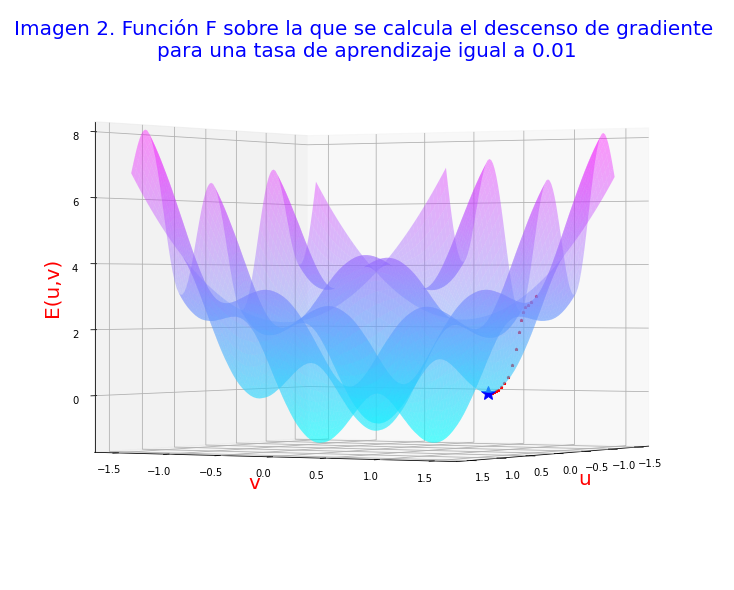

In [128]:
display_figure(1.5, F, coordenates, 'plasma','Imagen 2. Función F sobre la que se calcula el descenso de gradiente \npara una tasa de aprendizaje igual a 0.01', 0, 30)

<font color = DarkCyan>A raiz de la imagen 2 vemos como se ha ido actualizando el punto "descendiendo" por la función. Incluso respecto a la función que analizamos anteriormente se puede apreciar de mejor manera como el gradiente, a medida que este es menos grande (menos pendiente) los "pasos" que da el algoritmo son más "cortos".</font>

<font color = DarkCyan>Tal y como se nos pide en el apartado, mostramos la evolución del gradiente en función del valor de w calculado en cada iteración.</font>

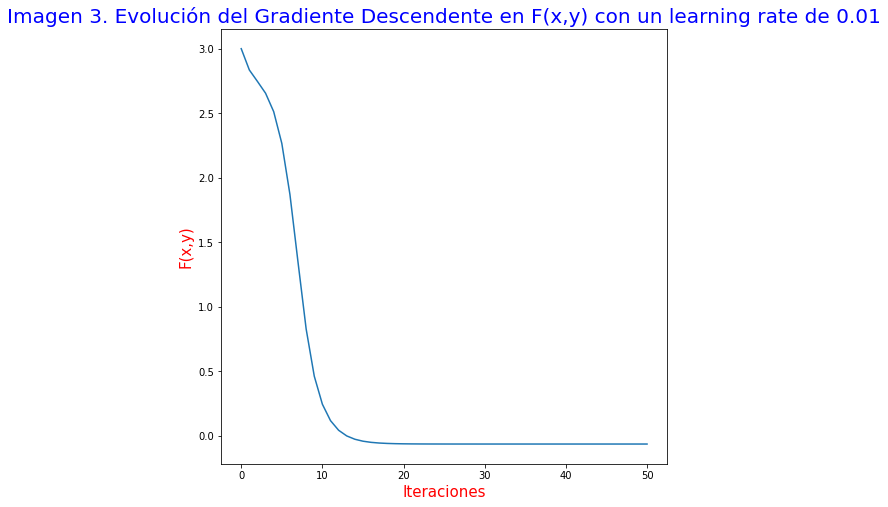

In [129]:
"""
Función para mostrar como varía el error con el número de iteraciones 
en una función

Parámetros: 
  - err_and_it: vector en la que cada componente representa (error de la iteración i-ésima, iteración i-ésima)
  - title: título de la gráfica que se mostrará
"""
def grafico_err_it(err_and_it, title):
  err_and_it = np.array(err_and_it)
  fig = plt.figure(figsize=(8,8))
  ax = fig.add_subplot()
  ax.plot(err_and_it[:, 1], err_and_it[:,0])
  ax.set_xlabel('Iteraciones', fontsize=15, c='r')
  ax.set_ylabel('F(x,y)', fontsize=15, c='r')
  ax.set_title(title, fontsize=20, c ='b')
  plt.show()

grafico_err_it(err_and_it, 'Imagen 3. Evolución del Gradiente Descendente en F(x,y) con un learning rate de 0.01')

<font color = DarkCyan>Como se puede apreciar en la imagen 3, al principio el error decrece mucho por iteracion debido a que hay una gran pendiente, mientras que a partir de la decima iteración aproximadamente esa tendencia cambia a otra en la que el error va decreciendo por iteracion pero de una forma mucho más leve, lo que quiere decir que hay poca pendiente en esa zona.</font>

<font color = DarkCyan>Conforme a lo que se pide en el apartado repetimos el experimento pero ahora con un learning rate de 0.1:</font>

In [130]:
# configuración de parámetros
eta = 0.1
maxIter = 50
initial_point = np.array([-1.0,1.0])
w, it, err_and_it, coordenates = gradient_descentF(initial_point, eta, gradF, F, maxIter)

print('Numero de iteraciones: ', it)
print('Coordenadas obtenidas: (', w[0], ', ', w[1],')')
print()

Numero de iteraciones:  50
Coordenadas obtenidas: ( -1.1469533391634248 ,  -0.27323709278240627 )



<font color = DarkCyan>Mostramos la función y los valores que ha tomado w:</font>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


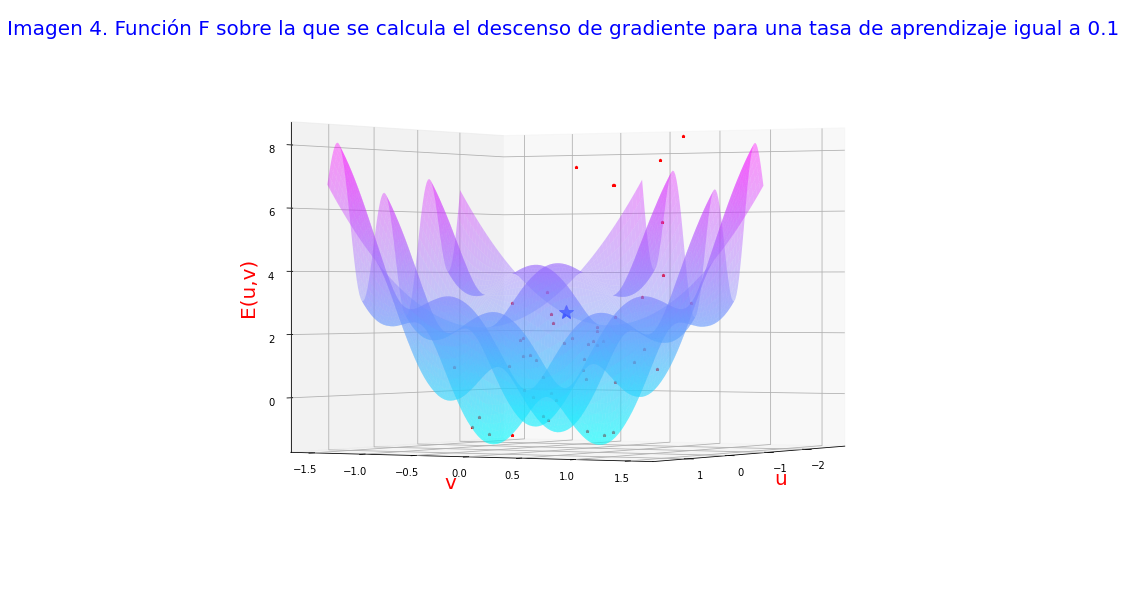

In [131]:
display_figure(1.5, F, coordenates, 'plasma','Imagen 4. Función F sobre la que se calcula el descenso de gradiente para una tasa de aprendizaje igual a 0.1', 0, 30)

<font color = DarkCyan>A raiz de la imagen vemos en la imagen 4, al haber cambiado el learning rate a otro 10 veces mas grande, ahora los "pasos" que da el algoritmo son demasiado grandes, por lo que a diferencia de cuando el learning rate es 0.01 no converge, sino que presenta un comportamiento más bien divergente.</font>

<font color = DarkCyan>Para que quede esto mas claro mostramos el valor que va tomando el error en cada iteración.</font>

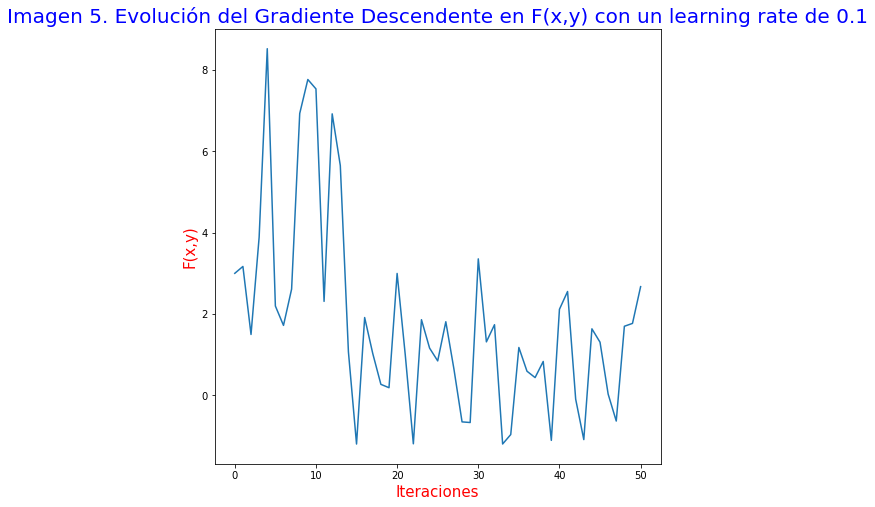

In [132]:
grafico_err_it(err_and_it, 'Imagen 5. Evolución del Gradiente Descendente en F(x,y) con un learning rate de 0.1')

<font color = DarkCyan>Fijándonos en la imagen 5, se aprecia claramente como al haber aumentado el learning rate x10 por cada iteración el error varía demasiado no pudiendo converger.</font>

<font color = DarkCyan>Ahora estamos en condiciones de responder a la pregunta:</font> 

- **Comentar las diferencias entre los dos experimentos**.
  - La diferencia entre ambos experimentos es que en el primero el learning rate es el apropiado para que converja, mientras que en el segundo este es tan grande que no puede converger y termina oscilando sin buen rumbo.
  
- **Comentar la dependencia de $\eta$.**
  - El valor de la tasa de aprendizaje determinará cuánto aprendemos por cada iteración, dicho de otro modo, cuánto de grande es el paso que damos hacia el mínimo local. Si el valor de este es demasiado bajo convergerá correctamente, pero necesitará un gran número de iteraciones, lo que no es bueno computacionalmente hablando. Por otro lado, si es demasiado alto avanzará demasiado por cada iteración, podiendo no converger. La **clave** es encontrar un learning rate que avance lo maximo posible pero que no por ello tome una tendencia divergente.

<font color = Sienna size= 4>**b**) Obtener el valor mínimo y los valores de las variables (x, y) en donde se alcanzan cuando
el punto de inicio se fija en: (-0.5, -0.5), (1, 1), (2.1,-2.1), (-3, 3), (-2, 2). Generar una tabla con los valores obtenidos, empleando el máximo número de iteraciones (50) y las tasas de aprendizaje del anterior apartado (η = 0,01 y η = 0,1). Comentar la dependencia del punto inicial.</font>


<font color = DarkCyan>Mostramos la tabla:</font>

In [16]:
#Configuraciones para learning rate de 0.01
eta = 0.01
maxIter = 50

print("Learning rate: ", eta)
print('\nPunto Inicial                   Coordenadas                Error')
print("-------------------------------------------------------------------------")

initial_point = np.array([-0.5,-0.5])
w, it, points, coordenates = gradient_descentF(initial_point, eta, gradF, F, maxIter)
v_min = F(w[0], w[1])

print("(",initial_point[0], ",", initial_point[1], ")", "           (",  round(w[0], 3), ",", round(w[1],3), ")           ", round(v_min, 3))

initial_point = np.array([1.0,1.0])
w, it, points, coordenates = gradient_descentF(initial_point, eta, gradF, F, maxIter)
v_min = F(w[0], w[1])

print("(",initial_point[0], ",", initial_point[1], ")", "             (",  round(w[0], 3), ",", round(w[1],3), ")             ", round(v_min, 3))

initial_point = np.array([2.1,-2.1])
w, it, points, coordenates = gradient_descentF(initial_point, eta, gradF, F, maxIter)
v_min = F(w[0], w[1])

print("(",initial_point[0], ",", initial_point[1], ")", "            (",  round(w[0], 3), ",", round(w[1],3), ")             ", round(v_min, 3))

initial_point = np.array([3.0,-3.0])
w, it, points, coordenates = gradient_descentF(initial_point, eta, gradF, F, maxIter)
v_min = F(w[0], w[1])

print("(",initial_point[0], ",", initial_point[1], ")", "            (",  round(w[0], 3), ",", round(w[1],3), ")             ", round(v_min, 3))

initial_point = np.array([-2.0,2.0])
w, it, points, coordenates = gradient_descentF(initial_point, eta, gradF, F, maxIter)
v_min = F(w[0], w[1])

print("(",initial_point[0], ",", initial_point[1], ")", "            (",  round(w[0], 3), ",", round(w[1],3), ")             ", round(v_min, 3))


#Configuraciones para learning rate de 0.1
eta = 0.1

print("\n\nLearning rate: ", eta)
print('\nPunto Inicial                   Coordenadas                Error')
print("-------------------------------------------------------------------------")

initial_point = np.array([-0.5,-0.5])
w, it, points, coordenates = gradient_descentF(initial_point, eta, gradF, F, maxIter)
v_min = F(w[0], w[1])

print("(",initial_point[0], ",", initial_point[1], ")", "            (",  round(w[0], 3), ",", round(w[1],3), ")            ", round(v_min, 3))

initial_point = np.array([1.0,1.0])
w, it, points, coordenates = gradient_descentF(initial_point, eta, gradF, F, maxIter)
v_min = F(w[0], w[1])

print("(",initial_point[0], ",", initial_point[1], ")", "              (",  round(w[0], 3), ",", round(w[1],3), ")            ", round(v_min, 3))

initial_point = np.array([2.1,-2.1])
w, it, points, coordenates = gradient_descentF(initial_point, eta, gradF, F, maxIter)
v_min = F(w[0], w[1])

print("(",initial_point[0], ",", initial_point[1], ")", "             (",  round(w[0], 3), ",", round(w[1],3), ")              ", round(v_min, 3))

initial_point = np.array([3.0,-3.0])
w, it, points, coordenates = gradient_descentF(initial_point, eta, gradF, F, maxIter)
v_min = F(w[0], w[1])

print("(",initial_point[0], ",", initial_point[1], ")", "             (",  round(w[0], 3), ",", round(w[1],3), ")             ", round(v_min, 3))

initial_point = np.array([-2.0,2.0])
w, it, points, coordenates = gradient_descentF(initial_point, eta, gradF, F, maxIter)
v_min = F(w[0], w[1])

print("(",initial_point[0], ",", initial_point[1], ")", "             (",  round(w[0], 3), ",", round(w[1],3), ")             ", round(v_min, 3))

Learning rate:  0.01

Punto Inicial                   Coordenadas                Error
-------------------------------------------------------------------------
( -0.5 , -0.5 )            ( -0.731 , -0.414 )            -1.037
( 1.0 , 1.0 )              ( 0.731 , 0.414 )              -1.037
( 2.1 , -2.1 )             ( 1.665 , -1.173 )              4.634
( 3.0 , -3.0 )             ( 2.189 , -0.587 )              3.694
( -2.0 , 2.0 )             ( -1.664 , 1.171 )              4.634


Learning rate:  0.1

Punto Inicial                   Coordenadas                Error
-------------------------------------------------------------------------
( -0.5 , -0.5 )             ( -1.515 , -0.214 )             2.269
( 1.0 , 1.0 )               ( -1.424 , -0.266 )             2.854
( 2.1 , -2.1 )              ( 0.509 , 0.634 )               0.96
( 3.0 , -3.0 )              ( -1.196 , 0.211 )              0.361
( -2.0 , 2.0 )              ( 0.555 , 0.309 )              -0.057


<font color = DarkCyan>Respondiendo a la pregunta:</font>
- **Comentar la dependencia del punto inicial.**
  - El punto inicial determinará qué minimo local encontrará con el algorítmo (y por tanto que tan buena será la solución que dé el algoritmo), y el número de iteraciones necesarias para alcanzarlo.

<font color = Sienna size= 4>EJERCICIO.1.4: (1.5 punto)</font>
- **¿Cuál sería su conclusión sobre la verdadera dificultad de encontrar el mínimo
global de una función arbitraria?**
  
  - En base a los que se ha observado en los distintos experimentos que se han realizado, encuentro dos factores determinantes que condicionarán el comportamiento del algoritmo, independiente de la función a la que se aplique:
    
    - **Tasa de aprendizaje:**
    - **Punto inicial**

  - Ambos factores deberán ser adecuados para que se alcance una buena solución (un buen mínimo local).
  - Una buena forma de proceder para la elección del punto inicial sería generarlo varias veces aleatoriamente y quedarnos con la mejor solución (todo esto teniendo un learning rate adecuado a cada punto generado), ya que no se sabe cuál se debe escoger. 

---------------------------
<font size=5>**2. EJERCICIO SOBRE REGRESIÓN LINEAL (5.5 puntos)**</font>

<font color=green size= 3>Este ejercicio ajusta modelos de regresión a vectores de características extraídos a partir de
imágenes de dígitos manuscritos. En particular, se extraen dos características concretas que miden el valor medio del nivel de gris y la simetría del dígito respecto de su eje vertical. Solo se seleccionarán
para este ejercicio las imágenes de los números 1 y 5.</font>

<font color = Sienna size= 4>EJERCICIO.2.1:  2.5 puntos\
 Estimar un modelo de regresión lineal, a partir de los datos proporcionados por
los vectores de características dados, usando tanto el algoritmo de la pseudo-inversa como el
gradiente descendente estocástico (SGD). Las etiquetas serán $\{-1,1\}$, una por cada vector de
cada uno de los números. Pintar las soluciones obtenidas junto con los datos usados en el
ajuste. Valorar la bondad del resultado usando $E_{in}$ y $E_{out}$ (para $E_{out}$ calcular las predicciones
usando los datos del fichero de test).</font>

<font color = DarkCyan>Lo primero es declarar la función proporcionada por los profesores para leer los datos:</font>

In [133]:
label5 = 1
label1 = -1

# Funcion para leer los datos
def readData(file_x, file_y):
	# Leemos los ficheros
	datax = np.load(file_x)
	datay = np.load(file_y)
	y = []
	x = []
	# Solo guardamos los datos cuya clase sea la 1 o la 5
	for i in range(0,datay.size):
		if datay[i] == 5 or datay[i] == 1:
			if datay[i] == 5:
				y.append(label5)
			else:
				y.append(label1)
			x.append(np.array([1, datax[i][0], datax[i][1]]))

	x = np.array(x, np.float64)
	y = np.array(y, np.float64)

	return x, y

<font color = DarkCyan>Lo siguiente es definir una función que calcula el error cuadrático medio:</font>

In [134]:
"""
Función que calcula el error cuadrático medio.

Parámetros:
  - x: matriz en la que cada fila representa el vector de caracteristicas de una muestra.
  - y: Vector de etiquetas de cada muestra
  - w: Vector de pesos.

Return: retorna el error cuadrático medio.
"""
def Err(x,y,w):
  sum = 0 # variable donde guardaré el valor de la sumatoria
  n_samples = x.shape[0] # número de muestras

  for i in range(n_samples):
    v_sample = x[i] # vector de características de la muestra i-ésima
    label_sample = y[i] # etiqueta de la muestra i-ésima
    sum += (np.dot(w.T, v_sample) - label_sample)**2 # calculo error cuadrático de la muestra y lo acumulo
  
  mean_sum = sum / n_samples # media de la sumatoria

  return mean_sum


<font color = DarkCyan>Finalmente, implementamos el gradiente descendente estocástico:</font>

In [135]:
"""
Función que calcula el valor del gradiente de un minibatch.

Parámetros:
  - x: matriz en la que cada fila representa el vector de caracteristicas de una muestra.
  - y: Vector de etiquetas de cada muestra.
  - w: Vector de pesos.
  - mini_batch: vector de indices en el que cada componente representa los elementos de x que corresponden al minibatch
                que le vamos a calcular el gradiente.

Return: retorna el gradiente correspondiente a la parte de la población que se está evaluando. 
"""
def mini_batch_gradient(x,y,w, indices_mini_batch):
  sum = 0 # variable donde acumularé la sumatoria
  mini_batch_samples = indices_mini_batch.shape[0] # número de muestras en el minibatch

  #Bucle en el que los indices que se van recorriendo son los elementos del minibatch
  for i in indices_mini_batch:
    v_sample = x[i] # vector de características de una muestra i-ésima
    label_sample = y[i] # etiqueta de la muestra i-ésima
    sum += np.dot(v_sample, np.dot(w.T, v_sample) - label_sample) # acumulo suma

  mean_sum = sum / mini_batch_samples # media de la sumatoria

  return mean_sum * 2

"""
Función que implementa el algoritmo de descenso de gradiente estocástico.

Parámetros:
  - x: matriz en la que cada fila representa el vector de caracteristicas de una muestra.
  - y: Vector de etiquetas de cada muestra.
  - lr: tasa de aprendizaje.
  - epsilon: maximo error permitido.
  - max_iters: número máximo de iteraciones
  - size_batch: tamaño de cada minibatch
"""
def sgd(x, y, lr, epsilon, max_iters, size_batch):
  len_v_sample = x.shape[1] # tamaño del vector da características de una muestra
  n_samples = x.shape[0] # número de muestras
  iterations = 0 # número de iteraciones
  indices = np.random.permutation(n_samples) # indices del número de filas de x ordenados aleatoriamente
                                             # con los que posteriormente montaremos los minibatches
  min = 0 # límite inferior de los indices de un minibatch
  max = size_batch # límite superior de los indices de un minibatch

  w = np.zeros(len_v_sample, np.float64) # vector de pesos inicializado a cero.

  # mientras el error sea mayor que el maximo permitido y no se haya pasado del máximo de iteraciones posibles
  while(abs(Err(x, y, w)) > epsilon and iterations < max_iters):

    # Si el maximo se ha pasado pero el mínimo no actualizo max al tope
    # para tomar las muestras restantes que conformarían un minibatch 
    # de menor tamaño que el que se pasa por parámetro, pero hace que tenga en cuenta toda la población.
    #
    # Tambien resolvería el caso en el que el tamaño del minibatch que se pasa por
    # parámetro es superior a la población total.
    if(min < n_samples and max > n_samples):
      max = n_samples

    # monto un vector con las posiciones de x que conformaran el minibatch de esta iteración
    indices_mini_batch = indices[min:max]

    # actualizo w
    w = w - lr * mini_batch_gradient(x, y, w, indices_mini_batch)

    # preparo los límites para la siguiente iteración
    max += size_batch
    min += size_batch

    # cuando no me queden más muestra por mirar, desordeno los indices para tener nuevos minibath y empiezo de nuevo
    if(min > n_samples):
      indices = np.random.permutation(n_samples)
      min = 0
      max = size_batch

    # cuento la iteración
    iterations += 1

  return w, iterations

  
  

  

<font color = DarkCyan>Ponemos en marcha el algorítmo. Como no se ha indicado ningun parámetro que se le deba de pasar usaré los siguientes:</font>

- **Tasa de aprendizaje: 0.01**
- **Máximo de iteraciones: 5000**
- **Error máximo permitido: 0.081**
- **Tamaño de cada minibatch: 32**

<font color = DarkCyan>Lo ejecutamos para los datos de entrenamiento:</font>

In [137]:
# Lectura de los datos de entrenamiento
x, y = readData('datos/X_train.npy', 'datos/y_train.npy')

# Configuración del SGD:
size_batch = 32
maxIter = 5000
eta = 0.01
error2get = 0.081

w, it = sgd(x, y, eta, error2get, maxIter, size_batch)

print('Vector de pesos resultante:', w)
print("Numero de iteraciones: ", it)
print("Ein: ", Err(x,y,w))

Vector de pesos resultante: [-1.22662241 -0.33152205 -0.46420041]
Numero de iteraciones:  4581
Ein:  0.08099912574836045


<font color = DarkCyan>Ya que el Ein no es una medida muy descriptiva a la hora de saber lo bueno que es nuestro modelo, voy a dar una mucho más clara: el porcentaje de acierto del modelo a la hora de clasificar de las muestras.</font>

In [138]:
"""
Función que calcula el porcentaje de acierto de un modelo lineal
respecto a un conjunto de muestras.

Parámetros:
  - x: matriz en la que cada fila representa el vector de caracteristicas de una muestra.
  - y: Vector de etiquetas de cada muestra.
  - w: Vector de pesos del modelo lineal.
"""
def porcentaje_acierto_modelo_lineal(x,y,w):
  aciertos = 0
  fallos = 0
  n_samples = x.shape[0]

  # Para cada muestra evaluamos si la clasificación que ha hecho el modelo
  # es correcta, contabilizaremos cada acierto
  for i in range(n_samples):
    sign = w[0] + x[i,1]*w[1] + x[i,2]*w[2]

    if(sign >= 0 and y[i] > 0):
      aciertos += 1
    elif(sign < 0 and y[i] < 0):
      aciertos +=1
  
  # Devolvemos el tanto por ciento de acierto
  return aciertos / n_samples * 100

print(porcentaje_acierto_modelo_lineal(x,y,w))

99.35938500960923


<font color = DarkCyan>Vemos que para el conjunto de datos de entrenamiento el modelo presenta un porcentaje de acierto del 99.36%, lo cual quiere decir que hemos conseguido un muy buen ajueste. Sin ver la grafica podemos decir que el conjunto de muestras es casi o linealmente separable pues para haber obtenido tal porcentaje de acierto con un modelo lineal debe de ser así.</font>

<font color = DarkCyan>Lo visualizamos de todos modos para cerciorarnos:</font>

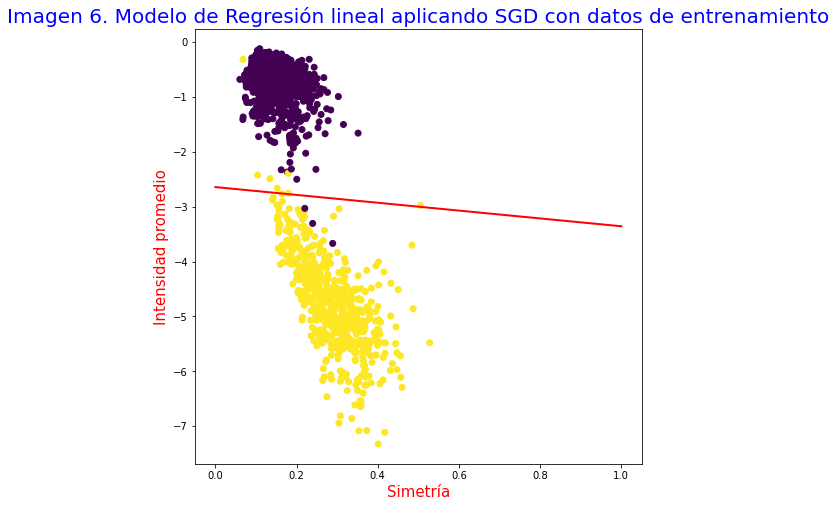

In [139]:
def grafico_modelo_lineal(x, y, w, title):
  X = np.linspace(0, 1, y.size)
  Y = (-w[0] - w[1]*X) / w[2]
  fig = plt.figure(figsize=(8,8))
  plt.scatter(x[:,1], x[:,2], c=y)
  plt.plot(X, Y, 'r-', linewidth=2)
  plt.title(title, c='b', fontsize=20)
  plt.ylabel('Intensidad promedio',fontsize=15, c='r')
  plt.xlabel('Simetría',fontsize=15, c='r')
  plt.show()

grafico_modelo_lineal(x,y,w,'Imagen 6. Modelo de Regresión lineal aplicando SGD con datos de entrenamiento')

<font color = DarkCyan>En vista de lo que se ve en la imagen 6, tal y como apuntaba el resultado anterior la población es casi linealmente separable.</font>

<font color = DarkCyan>Ahora vamos a ver como se comporta el vector de pesos obtenido con los datos de test:</datos>

In [140]:
# Lectura de los datos para el test
x_test, y_test = readData('datos/X_test.npy', 'datos/y_test.npy')

print("Eout: ", Err(x_test,y_test,w))

Eout:  0.13410872691743742


<font color = DarkCyan>Calculamos el porcentaje de acierto:</font>

In [141]:
print(porcentaje_acierto_modelo_lineal(x_test,y_test,w))

98.11320754716981


<font color = DarkCyan>Vemos que para el conjunto de datos de test el modelo presenta un porcentaje de acierto del 98.11%, lo cual quiere decir que hemos conseguido un muy buen ajuste tanto para las muestras de entrenamiento como para las de test.</font>

<font color = DarkCyan>Lo visualizamos:</font>

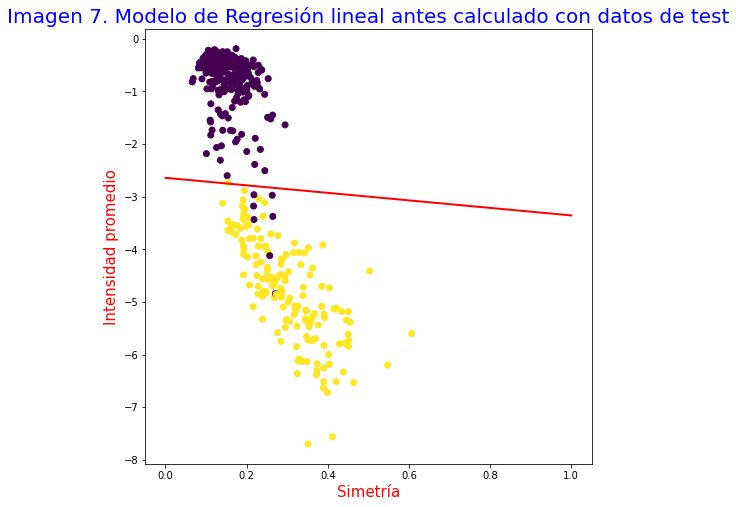

In [142]:
grafico_modelo_lineal(x_test,y_test,w,'Imagen 7. Modelo de Regresión lineal antes calculado con datos de test')

<font color = DarkCyan>Vemos como la imagen 7 se ajusta al porcentaje de acierto que habíamos calculado.</font>

<font color = DarkCyan>Ahora vamos a obtener un modelo de regresion lineal pero con el método de la pseudoinversa, a traves de la descomposición en valores singulares.

Para ello partimos de que:</font>

- <font color=blue size=5>$X^\dagger = VD^{-1}U^T$</font>
- <font color=blue size=5>$w = X^\dagger y = VD^{-1}U^Ty$</font>

In [143]:
"""
Función que calcula el w de un modelo de regresión lineal por el método 
de la pseudoinversa

Parámetros:
  - x: matriz en la que cada fila representa el vector de caracteristicas de una muestra.
  - y: Vector de etiquetas de cada muestra.

Return: retorna el vector de pesos w.
"""
def pseudoinverse(x,y):

  #SVD
  u, d, v = np.linalg.svd(x, full_matrices=False)

  #formamos d como matriz diagonal
  d = np.diag(d)
  
  #calculamos w
  w = np.dot(np.dot(np.dot(u.T,y),np.linalg.inv(d)),v)

  return w

<font color = DarkCyan>Lo probamos con el conjunto de datos de entrenamiento:</font>

In [144]:
#---- PSEUDOINVERSA ----
wpinv = pseudoinverse(x, y)

print('Vector de pesos resultante: ', wpinv)
print("Ein: ", Err(x,y,wpinv))

Vector de pesos resultante:  [-1.11588016 -1.24859546 -0.49753165]
Ein:  0.07918658628900382


<font color = DarkCyan>De nuevo, como el Ein no es muy descriptivo calculo el porcentaje de aciertos a la hora de clasificar el modelo:</font>

In [145]:
print(porcentaje_acierto_modelo_lineal(x,y,wpinv))

99.48750800768738


<font color = DarkCyan>Observamos como el porcentaje de acierto es 99.49%. Con respecto al método SGD vemos como la pseudoinversa se comporta un poco mejor.</font>

<font color = DarkCyan>Como venimos haciendo, lo visualizamos:</font>

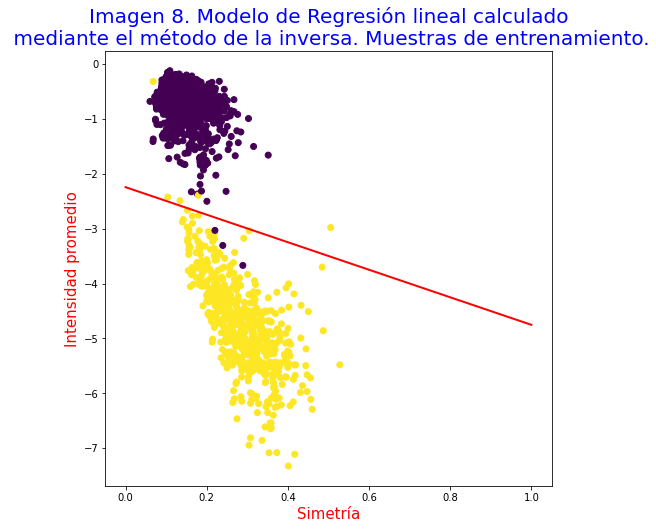

In [146]:
grafico_modelo_lineal(x,y,wpinv,'Imagen 8. Modelo de Regresión lineal calculado\n \
mediante el método de la inversa. Muestras de entrenamiento.')

<font color = DarkCyan>Ahora vamos a ver como se comporta el vector de pesos obtenido con los datos de test:</datos>

In [147]:
print("Eout: ", Err(x_test,y_test,wpinv))

Eout:  0.13095383720052578


<font color = DarkCyan>De nuevo calculamos el porcentaje de acierto:</font>

In [148]:
print(porcentaje_acierto_modelo_lineal(x_test,y_test,wpinv))

98.34905660377359


<font color = DarkCyan>Hemos obtenido un 98.35% de acierto con datos de test, un valor muy similar al que habíamos obtenido con SGD.</font>

<font color = DarkCyan>Finalmente lo visualizamos:</font>

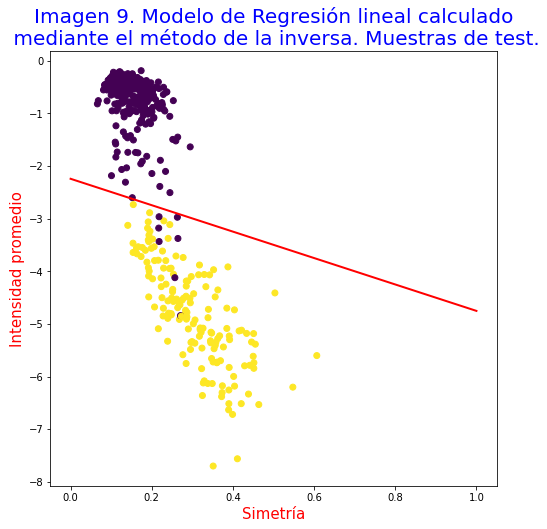

In [149]:
grafico_modelo_lineal(x_test,y_test,wpinv,'Imagen 9. Modelo de Regresión lineal calculado\n \
mediante el método de la inversa. Muestras de test.')

<font color = DarkCyan>Como último punto antes de acabar este apartado, vamos a hacer un inciso entre la diferencia entre un método y otro:</font>

- Mientras que SGD necesita un determinado número de iteraciones, el método de la pseudoinversa es un método directo, de hecho por ser un método directo proporciona la mejor solución en términos de minimizar el error.

<font color = Sienna size= 4>EJERCICIO.2.2:  3 puntos\
 En este apartado exploramos cómo se transforman los errores Ein y Eout cuan-
do aumentamos la complejidad del modelo lineal usado. Ahora hacemos uso de la función
$simula\_unif (N, 2, size)$ que nos devuelve N coordenadas 2D de puntos uniformemente mues-
treados dentro del cuadrado definido por $[−size, size]\times[−size, size]$. Se debe realizar el siguiente experimento: \
**a**) Generar una muestra de entrenamiento de $N = 1000$ puntos en el cuadrado $X = [−1, 1]\times
[−1, 1]$. Pintar el mapa de puntos 2D.\
</font>
 

<font color = DarkCyan>Definimos una función que genere las muestras de entrenamiento tal y como nos pide el apartado:</font>

In [150]:
""" 
Función que simula datos en un cuadrado [-size,size]x[-size,size] 
de manera uniforme

Parámetros:
  - N: filas de la matriz donde guardará los datos.
  - dims: columnas de la matriz donde guardará los datos.
  - size: dimensiones donde se distribuirán los puntos

Return: retorna la distribución uniforme de puntos.
"""
def simula_unif(N=2, dims=2, size=(0, 1)):
    m = np.random.uniform(low=size[0], 
                          high=size[1], 
                          size=(N, dims))
    
    return m

<font color = DarkCyan>Visualizamos las muestras de entrenamiento:</font>

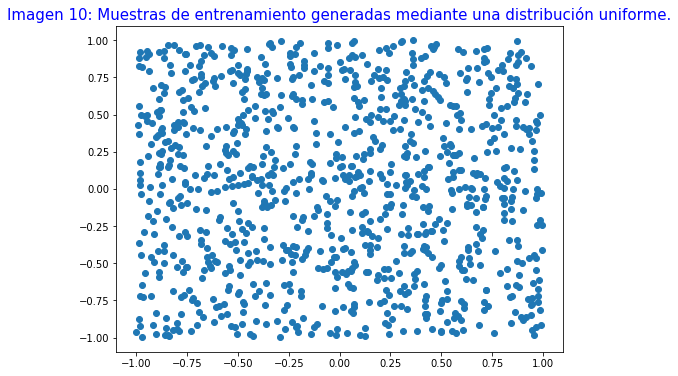

In [172]:
train_sample = simula_unif(N=1000, dims=2, size=(-1, 1))

plt.figure(figsize=(8,6))
plt.scatter(train_sample[:,0], train_sample[:,1])
plt.title('Imagen 10: Muestras de entrenamiento generadas mediante una distribución uniforme.', c = 'b',fontsize=15)
plt.show()  

<font color = DarkCyan>En la imagen 10 podemos observar como las muestras estan distribuidas de manera uniforme en $X = [−1, 1]\times
[−1, 1]$

<font color = Sienna size= 4>**b**) Consideremos la función $f(x_1, x_2) = sign((x_1 − 0,2)^2 + x_2^2 − 0,6)$ que usaremos para
asignar una etiqueta a cada punto de la muestra anterior. Introducimos ruido sobre las
etiquetas cambiando aleatoriamente el signo de un $10\%$ de las mismas. Pintar el mapa
de etiquetas obtenido.\
</font>

<font color = DarkCyan>Lo primero es implementar la función f:</font>

In [166]:
"""
Función que implementa f.

Parámetros:
  - x1: vector que contienen la primera coordenada de los puntos que se le pasa a la función.
  - x2: vector que contienen la segunda coordenada de los puntos que se le pasa a la función.

  Return: el vector con las etiquetas que clasifican a cada muestra.
"""
def f(x1, x2):
    f = []

    for i in range(x1.shape[0]):
        # Evaluamos signo
        if((x1[i] - 0.2)**2 + x2[i]**2 - 0.6) >= 0:
            f.append(1)
        else:
            f.append(-1)
    
    f = np.reshape(f, (-1,1))

    return np.array(f)

<font color = DarkCyan>Tras esto debemos le añadimos ruido a las etiquetas que hemos obtenido con f:</font>

In [153]:
"""
Función que aplica ruido a un vector de etiquetas.

Parámetros:
  - f: el vector con las etiquetas que clasifican a cada muestra.
  - porcentaje: porcentaje de las etiquetas que le vamos a aplicar ruido.

  Return: el vector con las etiquetas que clasifican a cada muestra con ruido aplicado.
"""
def noise_f(f, porcentaje):
    # Elegimos un porcentaje de las muestras de f
    index = np.random.choice(range(f.shape[0]),  size = int(porcentaje*f.shape[0]), replace=True)
    
    for i in range(f.shape[0]):
        # Para dichas muestras elegidas le cambiamos la etiqueta para meter ruido
        if np.isin(i,index):
            f[i] = -f[i]

    f = np.reshape(f, (-1,1))

    return np.array(f)

<font color = DarkCyan>Para comprobar que todo funciona correctamente visualizamos las muestras pintada cada una con su clasificación, tanto para f como para f con ruido. Lo hacemos primero para f:</font>

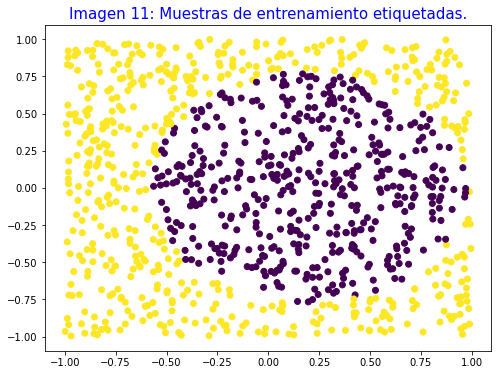

In [173]:
# mostramos etiquetas sin ruido
label_train_sample = f(train_sample[:,0],train_sample[:,1])
plt.figure(figsize=(8,6))
plt.scatter(train_sample[:,0], train_sample[:,1], c = label_train_sample[:,0]) #Para puntos
plt.title('Imagen 11: Muestras de entrenamiento etiquetadas.', c = 'b',fontsize=15)
plt.show()  #Muestra una grafica de puntos aleatorios

<font color = DarkCyan>Ahora para f con ruido:</font>

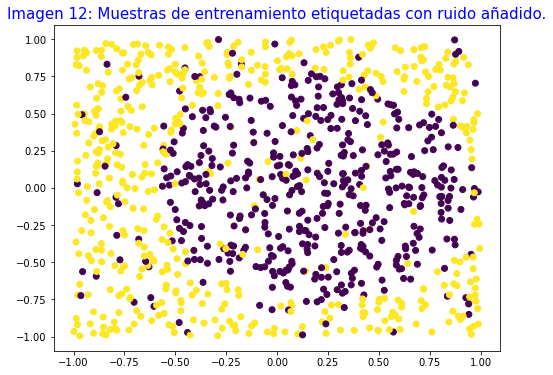

In [174]:
# mostramos etiquetas con ruido
noise_label_train_sample = noise_f(label_train_sample, 0.1)
plt.figure(figsize=(8,6))
plt.scatter(train_sample[:,0], train_sample[:,1],c = noise_label_train_sample) #Para puntos
plt.title('Imagen 12: Muestras de entrenamiento etiquetadas con ruido añadido.', c = 'b',fontsize=15)
plt.show()  #Muestra una grafica de puntos aleatorios

<font color = DarkCyan>Se aprecia claramente como en la imagen 12 se ha añadido ruido respecto a la imagen 11.</font>

<font color = Sienna size= 4>**c**) Usando como vector de características (1, x1, x2), ajustar un modelo de regresión lineal al conjunto de datos generado y estimar los pesos ${\bf w}$. Estimar el error de ajuste $E_{in}$ usando SGD. \
</font>

<font color = DarkCyan>Montamos la matriz de caracteríticas y usamos SGD al que le aplicaremos la siguiente configuración:</font>

- **Tamaño de cada minibatch: 32.**
- **Learning Rate: 0.1.**
- **Número máximo de iteraciones: 200.**
- **Máximo error admitido: 0.8.**

In [187]:
x = np.c_[np.ones((1000, 1), np.float64), train_sample]
y = noise_label_train_sample
y.shape = (1000,)

size_batch = 32
eta = 0.1
maxIter = 200
error2get = 0.8

w, it = sgd(x, y, eta, error2get, maxIter, size_batch)

print('Iteraciones necesarias: ', it)
print("Ein: ", Err(x,y,w))

Iteraciones necesarias:  200
Ein:  0.9241836547380147


<font color = DarkCyan>Como hicimos anteriormente calculamos el porcentaje de acierto del modelo:</font>

In [176]:
print(porcentaje_acierto_modelo_lineal(x,y,w))

63.6


<font color = DarkCyan>Presenta un % de acierto que oscila entre 55-65%, lo que quiere decir que el modelo no se ajusta muy bien, normal pues los datos no son linealmente separables.

Mostramos el modelo resultante:</font>

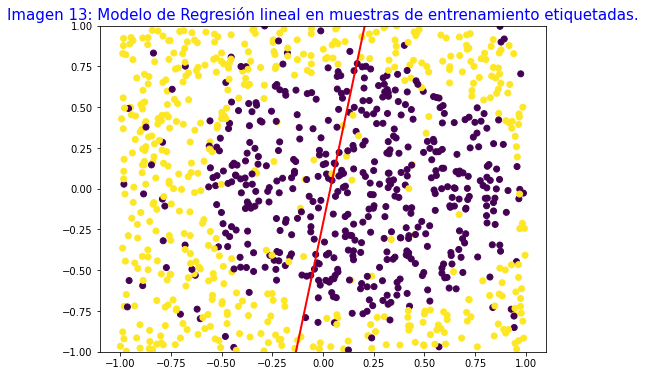

In [177]:
# Plot outputs
lineX = np.linspace(-1, 1, y.size)
lineY = (-w[0] - w[1]*lineX) / w[2]

plt.figure(figsize=(8,6))

plt.scatter(x[:,1], x[:,2], c=y)
plt.plot(lineX, lineY, 'r-', linewidth=2)

plt.title('Imagen 13: Modelo de Regresión lineal en muestras de entrenamiento etiquetadas.', c = 'b',fontsize=15)
plt.ylim(-1.0,1.0)
plt.show()

<font color = DarkCyan>Podemos ver como con una recta el modelo ha intentado clasificar las muestras lo mejor que puede dentro de sus posibilidades.</font>

<font color = Sienna size= 4>**d**) Ejecutar todo el experimento definido por (a)-(c) 1000 veces (generamos 1000 muestras
diferentes) y calcular el valor medio de los errores $E_{in}$ de las 1000 muestras.
Generar 1000 puntos nuevos por cada iteración y calcular con ellos el valor de $E_{out}$
en dicha iteración. Calcular el valor medio de $E_{out}$ en todas las iteraciones. \
</font>

<font color = DarkCyan>Para este experimento implementaremos una función que realice todo el proceso que hemos hasta ahora con las muestras 1000 veces, para finalmente calcular la media de Ein y Eout.</font>

In [189]:
def rep_lineal_experiment(N):
    EinM = 0
    EoutM = 0
    
    for i in range (N):
        print("Experimento ",i)

        # Muestra de entrenamiento
        train_sample = simula_unif(N=1000, dims=2, size=(-1, 1))
        label_train_sample = f(train_sample[:,0],train_sample[:,1])
        y = noise_f(label_train_sample,0.1)
        y.shape = (1000,)
        x = np.c_[np.ones((1000, 1), np.float64), train_sample]

        # Muestra de test
        test_sample = simula_unif(N=1000, dims=2, size=(-1, 1))
        label_test_sample = f(test_sample[:, 0], test_sample[:, 1])
        y_test = noise_f(label_test_sample,0.1)
        y_test.shape = (1000,)
        x_test = np.c_[np.ones((1000, 1), np.float64), train_sample]
    
        w, it = sgd(x, y, 0.1, 0.8, 200, 32)

        EinM = EinM + Err(x, y, w)                  # Vamos acumulando los valores
        EoutM = EoutM + Err(x_test, y_test, w)      # en estas vaiables

        
    print ("Media Ein: ", EinM/N)
    print ("Media Eout: ", EoutM/N)

In [190]:
print('\nApartado D:\n ')
rep_lineal_experiment(1000)


Apartado D:
 
Experimento  0
Experimento  1
Experimento  2
Experimento  3
Experimento  4
Experimento  5
Experimento  6
Experimento  7
Experimento  8
Experimento  9
Experimento  10
Experimento  11
Experimento  12
Experimento  13
Experimento  14
Experimento  15
Experimento  16
Experimento  17
Experimento  18
Experimento  19
Experimento  20
Experimento  21
Experimento  22
Experimento  23
Experimento  24
Experimento  25
Experimento  26
Experimento  27
Experimento  28
Experimento  29
Experimento  30
Experimento  31
Experimento  32
Experimento  33
Experimento  34
Experimento  35
Experimento  36
Experimento  37
Experimento  38
Experimento  39
Experimento  40
Experimento  41
Experimento  42
Experimento  43
Experimento  44
Experimento  45
Experimento  46
Experimento  47
Experimento  48
Experimento  49
Experimento  50
Experimento  51
Experimento  52
Experimento  53
Experimento  54
Experimento  55
Experimento  56
Experimento  57
Experimento  58
Experimento  59
Experimento  60
Experimento  61
Exp

<font color = Sienna size= 4>**e**) Valore qué tan bueno considera que es el ajuste con este modelo lineal a la vista de los
valores medios obtenidos de $E_{in}$ y $E_{out}$.
</font>

<font color = DarkCyan>Más que ha vista de los valores de Ein y Eout, valoramos mejor el desempeño del modelo, por un lado, en base al porcentaje de acierto, el cual como hemos visto antes es bajo, y por otro lado, en base a la imagen 13 vemos como un modelo lineal no puede ajustarse bien a los datos de muestra, necesitaríamos añadir características no lineales para conseguir un mejor clasificación. También fijándonos en el error, como es normal, el error fuera de la muestra es mayor que dentro de la muestra.</font>

<font color = Sienna size= 4>*   Repetir el mismo experimento anterior pero usando características no lineales. Ahora
usaremos el siguiente vector de características: $\Phi(x) = (1, x_1, x_1^2,x_1x_2, x_2, x_2^2)$. Ajustar el nuevo modelo de regresión lineal y calcular el nuevo vector de pesos $\bf\hat w$. Calcular los errores promedio de $E_{in}$ y $E_{out}$.</font>

<font color = DarkCyan>Montamos la matriz de caracteríticas con las caracteríticas no lineales y usamos SGD al que le aplicaremos la siguiente configuración:</font>

- **Tamaño de cada minibatch: 32.**
- **Learning Rate: 0.1.**
- **Número máximo de iteraciones: 200.**
- **Máximo error admitido: 0.5.**

In [188]:
x = np.c_[np.ones((1000, 1), np.float64), train_sample[:,0], (train_sample[:,0])**2,
          train_sample[:,0]*train_sample[:,1], train_sample[:,1], (train_sample[:,1])**2]

y = noise_label_train_sample
y.shape = (1000,)

# configuración sgd
maxIter = 200
eta = 0.1
error2get = 0.5
size_batch = 32

w, it = sgd(x, y, eta, error2get, maxIter, size_batch)

print('Iteraciones necesarias: ', it)
print("Ein: ", Err(x,y,w))

Iteraciones necesarias:  200
Ein:  0.563057795451619


<font color = DarkCyan>Como esperábamos, al añadir características lineales conseguimos un bastante mejor ajuste para la muestra con la que estamos trabajando.</font>

<font color = DarkCyan>Tal y como venimos haciendo, calculamos el porcentaje de acierto para tener una mejor idea del desempeño de las características no lineales:</font>

In [180]:
"""
Función que calcula el porcentaje de acierto de un modelo no lineal
respecto a un conjunto de muestras.

Parámetros:
  - x: matriz en la que cada fila representa el vector de caracteristicas de una muestra.
  - y: Vector de etiquetas de cada muestra.
  - w: Vector de pesos del modelo lineal.
"""
def porcentaje_acierto_modelo_no_lineal(x,y,w):
  aciertos = 0
  fallos = 0
  n_samples = x.shape[0]

  # Para cada muestra evaluamos si la clasificación que ha hecho el modelo
  # es correcta, contabilizaremos cada acierto
  for i in range(n_samples):
    sign = w[0] + w[1]*x[i,1] + w[2]*x[i,1]**2 + w[3]*x[i,1]*x[i,4] + w[4]*x[i,4] + w[5]*x[i,4]**2

    if(sign >= 0 and y[i] > 0):
      aciertos += 1
    elif(sign < 0 and y[i] < 0):
      aciertos +=1
  
  # Devolvemos el tanto por ciento de acierto
  return aciertos / n_samples * 100

print(porcentaje_acierto_modelo_no_lineal(x,y,w))

85.1


<font color = DarkCyan>Tenemos un porcentaje de acierto que oscila entre 85-90%, lo que quiere decir que gracias a las características lineales hemos conseguido un ajuste mucho mejor al que teníamos solo con características lineales.

Para corroborar lo dicho dibujamos el modelo de regresión que hemos obtenido:</font>

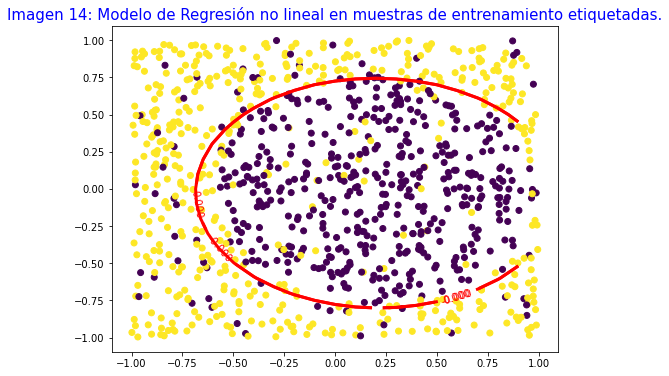

In [193]:
x1 = np.arange(-0.7, 1.0, 0.1)
y1 = np.arange(-0.8, 0.9, 0.1)
X, Y = np.meshgrid(x1, y1)
Z = w[0] + w[1]*X + w[2]*X**2 + w[3]*X*Y + w[4]*Y + w[5]*Y**2
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x[:,1], x[:,4], c=y)
CS = ax.contour(X, Y, Z ,colors='r', linewidths=3, levels=[-.0001, .0001], linestyles='-')
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Imagen 14: Modelo de Regresión no lineal en muestras de entrenamiento etiquetadas.', c = 'b',fontsize=15)
plt.show()

<font color = DarkCyan>Ahora la frontera de decisión es mucho más correcta a la recta que teníamos previamente.

Ahora, como último paso ejecuatamos el experimento 1000 veces para sacar la media de Ein y Eout:</font>

In [196]:
def rep_no_lineal_experiment(N):
    EinM = 0
    EoutM = 0
    
    for i in range(N):

        print("Experimento ",i)
        train_sample = simula_unif(N=1000, dims=2, size=(-1, 1))
        label_train_sample = f(train_sample[:,0],train_sample[:,1])
        y = noise_f(label_train_sample,0.1)
        y.shape = (1000,) 
        x = np.c_[np.ones((1000, 1), np.float64), train_sample[:,0], (train_sample[:,0])**2, train_sample[:,0]*train_sample[:,1], train_sample[:,1], (train_sample[:,1])**2]

        test_sample = simula_unif(N=1000, dims=2, size=(-1, 1))
        label_test_sample = f(test_sample[:, 0], test_sample[:, 1])
        y_test = noise_f(label_test_sample,0.1)
        y_test.shape = (1000,)
        x_test = np.c_[np.ones((1000, 1), np.float64), train_sample[:,0], (train_sample[:,0])**2,
        train_sample[:,0]*train_sample[:,1], train_sample[:,1], (train_sample[:,1])**2]
        
        w, it = sgd(x, y, 0.1, 0.5, 200, 32)
        EinM = EinM + Err(x, y, w)                  # Vamos acumulando los valores
        EoutM = EoutM + Err(x_test, y_test, w)      # en estas vaiables
        
        
    print ("Media Ein: ", EinM/N)
    print ("Media Eout: ", EoutM/N)

In [197]:
print('\nApartado D:\n ')
rep_no_lineal_experiment(1000)


Apartado D:
 
Experimento  0
Experimento  1
Experimento  2
Experimento  3
Experimento  4
Experimento  5
Experimento  6
Experimento  7
Experimento  8
Experimento  9
Experimento  10
Experimento  11
Experimento  12
Experimento  13
Experimento  14
Experimento  15
Experimento  16
Experimento  17
Experimento  18
Experimento  19
Experimento  20
Experimento  21
Experimento  22
Experimento  23
Experimento  24
Experimento  25
Experimento  26
Experimento  27
Experimento  28
Experimento  29
Experimento  30
Experimento  31
Experimento  32
Experimento  33
Experimento  34
Experimento  35
Experimento  36
Experimento  37
Experimento  38
Experimento  39
Experimento  40
Experimento  41
Experimento  42
Experimento  43
Experimento  44
Experimento  45
Experimento  46
Experimento  47
Experimento  48
Experimento  49
Experimento  50
Experimento  51
Experimento  52
Experimento  53
Experimento  54
Experimento  55
Experimento  56
Experimento  57
Experimento  58
Experimento  59
Experimento  60
Experimento  61
Exp

<font color = Sienna size= 4>*   A la vista de los resultados de los errores promedios $E_{in}$ y $E_{out}$ obtenidos en los dos experimentos, ¿qué modelo considera que es el más adecuado? Justifique la respuesta.</font>

<font color = DarkCyan>En base a los resultados obtenido, y tal y como dice la teoría, al añadir características no lineales bajamos el Ein ya que se puede adaptar mejor a las muestras a las que se ajusta el modelo, pero debido a ese ajuste tan exclusivo a esa muestra, cuando utilizamos ese modelo con otras muestras obtenemos un Eout mucho mas alto, incluso que el que obtenemos con el modelo lineal.</font>

<font color = Sienna size= 4>**BONUS** (2 puntos) 
**El BONUS solo se tendrá en cuenta si se ha obtenido al menos el 75 % de los puntos de la parte obligatoria**

Implementar el algoritmo de minimizaciónn de Newton y aplicarlo a la función $f(x, y)$ dada en el Ejercicio 1.3. Desarrolle los mismos experimentos usando los mismos puntos de inicio.
Generar un gráfico de cómo desciende el valor de la función con las iteraciones. Extraer conclusiones sobre las conductas de los algoritmos comparando la curva de decrecimiento de la función calculada en el apartado anterior y la correspondiente obtenida con gradiente descendente</font>

<font color = DarkCyan>Lo primero que debemos hacer el obtener las segundas derivadas para montar la matriz Hessiana siendo estas:</font>

- <font size = 5 color = blue> $ \frac{\partial² f}{\partial x²}=2-8\pi²sin(\pi y)sin(2\pi x)$</font>
- <font size = 5 color = blue> $ \frac{\partial² f}{\partial y²}=4-2\pi²sin(2\pi x)sin(\pi y)$</font>
- <font size = 5 color = blue> $ \frac{\partial² f}{\partial xy}=4\pi²cos(2\pi x)cos(\pi y)$</font>
- <font size = 5 color = blue> $ \frac{\partial² f}{\partial yx}=4\pi²cos(\pi y)cos(2\pi x)$</font>

- <font color = DarkCyan>Definimos la hessiana de f como:</font>
<font size = 5 color = blue>\begin{pmatrix}
    \frac{\partial² f}{\partial x²} & \frac{\partial² f}{\partial xy}\\
    \frac{\partial² f}{\partial yx} & \frac{\partial² f}{\partial y²}\\
\end{pmatrix}</font>

In [198]:

"""
Funciones que implementan las derivadas parciales de f

Parámetros:
  - x: primera coordenada del punto.
  - y: segunda coordenada del punto.

Return: valor de la derivada en el punto.
"""
def d2Fx(x, y):
    return 2 - 8*np.pi**2 * np.sin(np.pi*y) * np.sin(2*np.pi*x)

def d2Fy(x, y):
    return 4 - 2*np.pi**2 * np.sin(2*np.pi*x) * np.sin(np.pi*y)

def dFxy(x, y):
    return 4*np.pi**2 * np.cos(2*np.pi*x) * np.cos(np.pi*y)

def dFyx(x, y):
    return 4*np.pi**2 * np.cos(np.pi*y) * np.cos(2*np.pi*x)

<font color = DarkCyan>Ahora implementamos la hessiana:</font>

In [206]:
"""
Función que implementa la hessiana de f

Parámetros:
  - w: coordenadas del punto.

Return: retorna el valor de la hessiana en ese punto.
"""
def HessianF(w):
    return np.array([(d2Fx(w[0], w[1]), dFxy(w[0], w[1])), 
                     (dFyx(w[0], w[1]), d2Fy(w[0], w[1]))])

<font color = DarkCyan>Ahora ya estamos en condiciones de implementar el métodod de Newton:</font>

In [207]:
"""
Funcion que implementa el método de newton

Parámetros:
  - w: coordendadas iniciales
  - lr: tasa de aprendizaje
  - grad_fun: gradiente de la funcion
  - hessian_fun: hessiana de la funcion
  - fun: funcion a la que se va a aplicar el algoritmo
  - max_iters: numero maximo de iteraciones.

Return:
  - w: coordenadas del óptimo local encontrado.
  - iterations: numero de iteraciones que ha hecho el algorítmo.
  - err_and_it: valor del error en una iteración determinada:
  - coodenates: vector con los puntos que ha ido calculando el algoritmo hasta llegar a la
      solución 
"""
def newton_methodF(w, lr, grad_fun, hessian_fun, fun, max_iters):
  iterations = 0 # número de iteraciones
  err_and_it = [] # vector donde guarda el error en una cierta iteración
  coordenates = [] # coordenadas que va tomando el punto

  # mientas no lleguemos al tope de iteraciones:
  while(iterations < max_iters):
    err_and_it.append([F(w[0], w[1]), iterations])
    coordenates.append([w[0], w[1]])
    
    # actualizamos w
    w = w - lr * np.linalg.inv(hessian_fun(w)).dot(grad_fun(w))
    
    # aumentamos el número de iteraciones
    iterations += 1

  err_and_it.append([F(w[0], w[1]), iterations])
  coordenates.append([w[0], w[1]])
  
  return w, iterations, err_and_it, coordenates

<font color = DarkCyan>Lo probamos con los mismos parámetros que utilizamos para descenso de gradiente:</font>

In [208]:
# configuración de parámetros
eta = 0.01
maxIter = 50
initial_point = np.array([-1, 1])
w, it, err_and_it, coordenates = newton_methodF(initial_point, eta, gradF, HessianF, F, maxIter)

print('Numero de iteraciones: ', it)
print('Coordenadas obtenidas: (', w[0], ', ', w[1],')')
print('Error obtenido: ', F(w[0], w[1]))

Numero de iteraciones:  50
Coordenadas obtenidas: ( -0.9614317443510784 ,  0.9814024195267379 )
Error obtenido:  2.878677060292577


<font color = DarkCyan>Visualizamos el resultado para evaluar mejor el desempeño del algoritmo.</font>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


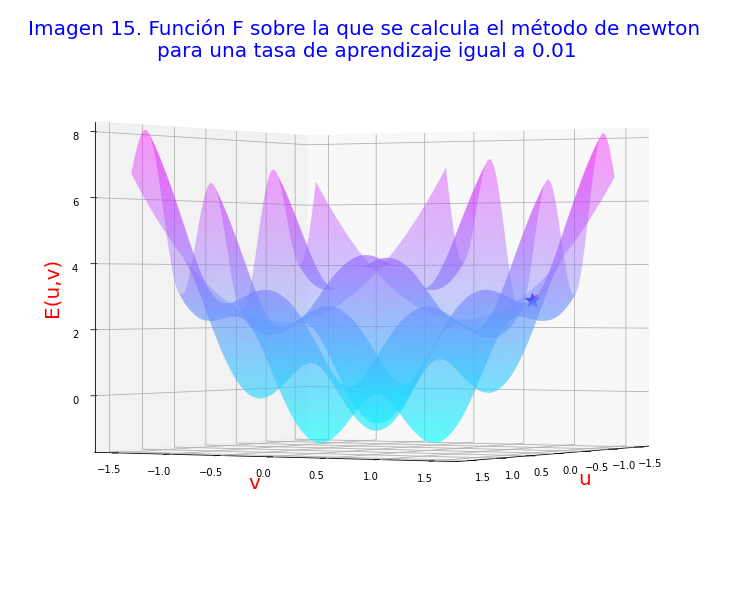

In [209]:
display_figure(-1.5, F, coordenates, 'plasma','Imagen 15. Función F sobre la que se calcula el método de newton \npara una tasa de aprendizaje igual a 0.01', 0, 30)

<font color = DarkCyan>Mostramos la gráfica que compara el número de iteraciones con el error, y la comparamos con lo que nos salía con descenso de gradiente:</font>

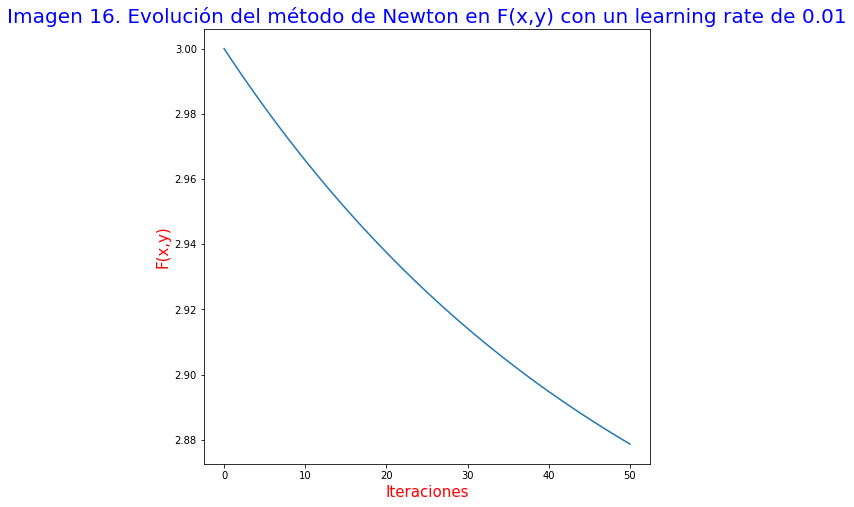

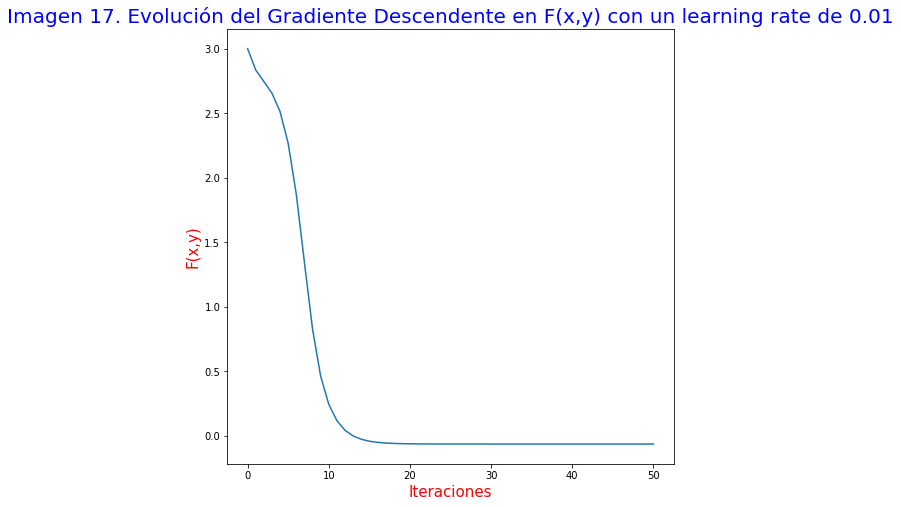

In [210]:
grafico_err_it(err_and_it, 'Imagen 16. Evolución del método de Newton en F(x,y) con un learning rate de 0.01')

# configuración de parámetros
eta = 0.01
maxIter = 50
initial_point = np.array([-1.0,1.0])
w, it, err_and_it, coordenates = gradient_descentF(initial_point, eta, gradF, F, maxIter)
grafico_err_it(err_and_it, 'Imagen 17. Evolución del Gradiente Descendente en F(x,y) con un learning rate de 0.01')


<font color = DarkCyan>Observamos como el método de newtom se ha quedado atrapado cuando el error es de 2.87, a diferencia de descenso de gradiente que llega hasta el mínimo local.

Ahora hacemos la comparación pero con un learning rate de 0.1:</font>

In [216]:
# configuración de parámetros
eta = 0.1
maxIter = 50
initial_point = np.array([-1, 1])
w, it, err_and_it, coordenates = newton_methodF(initial_point, eta, gradF, HessianF, F, maxIter)

print('Numero de iteraciones: ', it)
print('Coordenadas obtenidas: (', w[0], ', ', w[1],')')
print('Error obtenido: ', F(w[0], w[1]))

Numero de iteraciones:  50
Coordenadas obtenidas: ( -0.8962504346869387 ,  0.9429199632981196 )
Error obtenido:  2.7978791939801413


<font color = DarkCyan>Mostramos la gráfica para ver cómo se ha desempeñado el algoritmo:</font>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


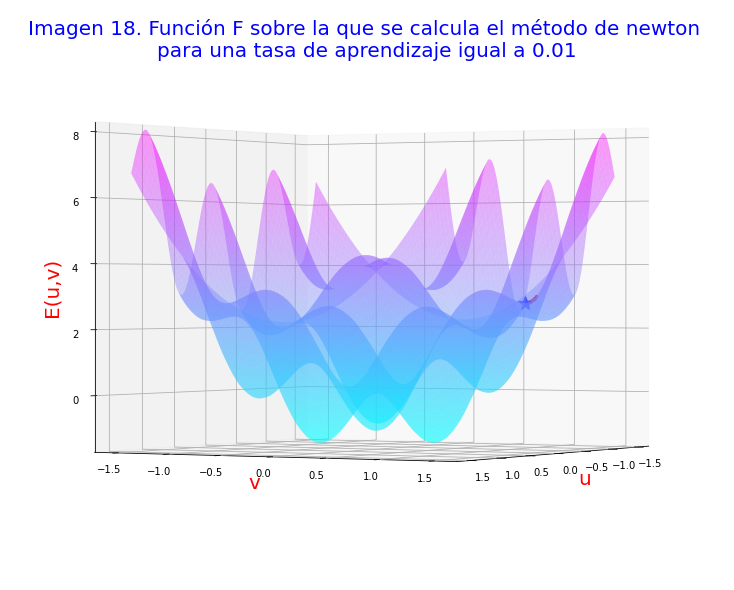

In [217]:
display_figure(-1.5, F, coordenates, 'plasma','Imagen 18. Función F sobre la que se calcula el método de newton \npara una tasa de aprendizaje igual a 0.01', 0, 30)

<font color = DarkCyan>Mostramos de nuevo las gráficas del error por iteración para comparar con descenso de gradiente:</font>

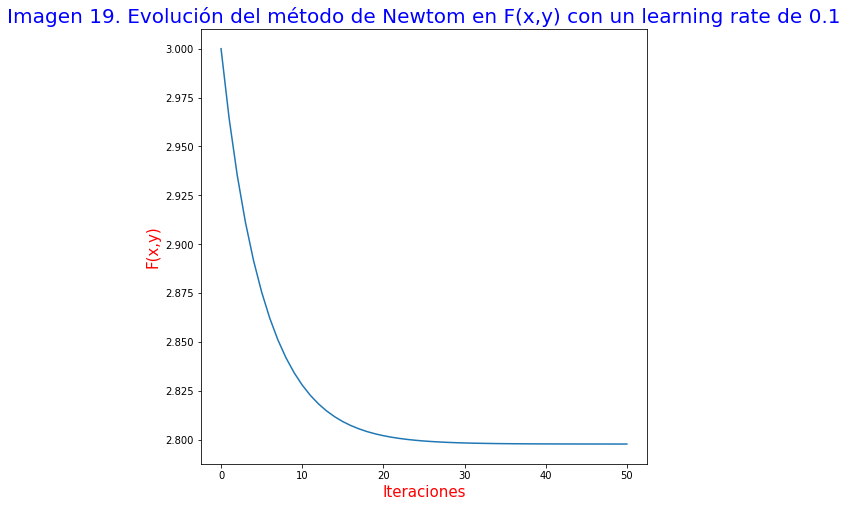

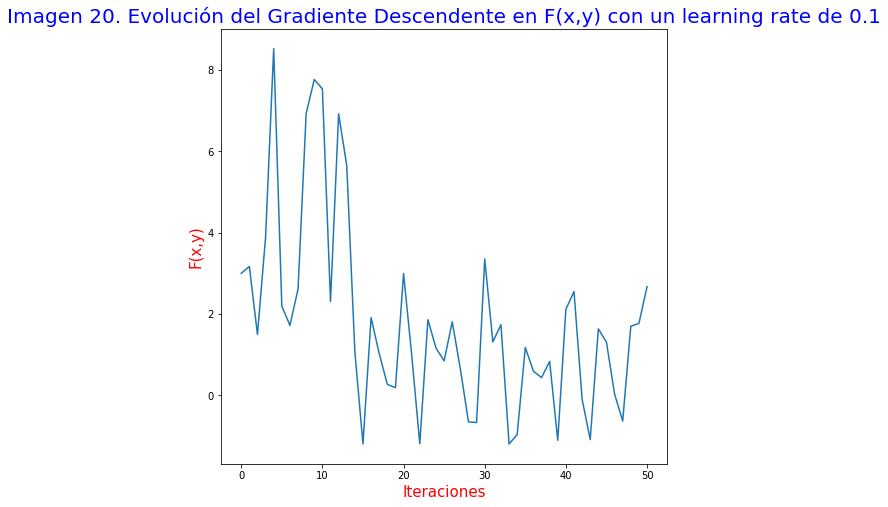

In [218]:
grafico_err_it(err_and_it, 'Imagen 19. Evolución del método de Newtom en F(x,y) con un learning rate de 0.1')

# configuración de parámetros
eta = 0.1
maxIter = 50
initial_point = np.array([-1.0,1.0])
w, it, err_and_it, coordenates = gradient_descentF(initial_point, eta, gradF, F, maxIter)
grafico_err_it(err_and_it, 'Imagen 20. Evolución del Gradiente Descendente en F(x,y) con un learning rate de 0.1')

<font color = DarkCyan>De nuevo, se ha vuelto a quedar pillado en 2.79, pero no ha tomado una tendencia divergente como el descenso de gradiente.</font>

<font color = DarkCyan>Montamos la tabla de resultados con todos los experimentos que hicimos para descenso de gradiente pero ahora para el método de newton</font>

In [214]:
#Configuraciones para learning rate de 0.01
eta = 0.01
maxIter = 50

print("Learning rate: ", eta)
print('\nPunto Inicial                   Coordenadas                Error')
print("-------------------------------------------------------------------------")

initial_point = np.array([-0.5,-0.5])
w, it, points, coordenates = newton_methodF(initial_point, eta, gradF, HessianF, F, maxIter)
v_min = F(w[0], w[1])

print("(",initial_point[0], ",", initial_point[1], ")", "           (",  round(w[0], 3), ",", round(w[1],3), ")           ", round(v_min, 3))

initial_point = np.array([1.0,1.0])
w, it, points, coordenates = newton_methodF(initial_point, eta, gradF, HessianF, F, maxIter)
v_min = F(w[0], w[1])

print("(",initial_point[0], ",", initial_point[1], ")", "             (",  round(w[0], 3), ",", round(w[1],3), ")              ", round(v_min, 3))

initial_point = np.array([2.1,-2.1])
w, it, points, coordenates = newton_methodF(initial_point, eta, gradF, HessianF, F, maxIter)
v_min = F(w[0], w[1])

print("(",initial_point[0], ",", initial_point[1], ")", "            (",  round(w[0], 3), ",", round(w[1],3), ")             ", round(v_min, 3))

initial_point = np.array([3.0,-3.0])
w, it, points, coordenates = newton_methodF(initial_point, eta, gradF, HessianF, F, maxIter)
v_min = F(w[0], w[1])

print("(",initial_point[0], ",", initial_point[1], ")", "            (",  round(w[0], 3), ",", round(w[1],3), ")             ", round(v_min, 3))

initial_point = np.array([-2.0,2.0])
w, it, points, coordenates = newton_methodF(initial_point, eta, gradF, HessianF, F, maxIter)
v_min = F(w[0], w[1])

print("(",initial_point[0], ",", initial_point[1], ")", "            (",  round(w[0], 3), ",", round(w[1],3), ")             ", round(v_min, 3))


#Configuraciones para learning rate de 0.1
eta = 0.1

print("\n\nLearning rate: ", eta)
print('\nPunto Inicial                   Coordenadas                Error')
print("-------------------------------------------------------------------------")

initial_point = np.array([-0.5,-0.5])
w, it, points, coordenates = newton_methodF(initial_point, eta, gradF, HessianF, F, maxIter)
v_min = F(w[0], w[1])

print("(",initial_point[0], ",", initial_point[1], ")", "            (",  round(w[0], 3), ",", round(w[1],3), ")            ", round(v_min, 3))

initial_point = np.array([1.0,1.0])
w, it, points, coordenates = newton_methodF(initial_point, eta, gradF, HessianF, F, maxIter)
v_min = F(w[0], w[1])

print("(",initial_point[0], ",", initial_point[1], ")", "              (",  round(w[0], 3), ",", round(w[1],3), ")              ", round(v_min, 3))

initial_point = np.array([2.1,-2.1])
w, it, points, coordenates = newton_methodF(initial_point, eta, gradF, HessianF, F, maxIter)
v_min = F(w[0], w[1])

print("(",initial_point[0], ",", initial_point[1], ")", "             (",  round(w[0], 3), ",", round(w[1],3), ")            ", round(v_min, 3))

initial_point = np.array([3.0,-3.0])
w, it, points, coordenates = newton_methodF(initial_point, eta, gradF, HessianF, F, maxIter)
v_min = F(w[0], w[1])

print("(",initial_point[0], ",", initial_point[1], ")", "             (",  round(w[0], 3), ",", round(w[1],3), ")             ", round(v_min, 3))

initial_point = np.array([-2.0,2.0])
w, it, points, coordenates = newton_methodF(initial_point, eta, gradF, HessianF, F, maxIter)
v_min = F(w[0], w[1])

print("(",initial_point[0], ",", initial_point[1], ")", "             (",  round(w[0], 3), ",", round(w[1],3), ")             ", round(v_min, 3))

Learning rate:  0.01

Punto Inicial                   Coordenadas                Error
-------------------------------------------------------------------------
( -0.5 , -0.5 )            ( -0.643 , -0.458 )            -0.718
( 1.0 , 1.0 )              ( 1.043 , 1.023 )               3.142
( 2.1 , -2.1 )             ( 2.529 , -2.719 )              21.455
( 3.0 , -3.0 )             ( 2.871 , -2.923 )              25.675
( -2.0 , 2.0 )             ( -2.091 , 2.053 )              12.625


Learning rate:  0.1

Punto Inicial                   Coordenadas                Error
-------------------------------------------------------------------------
( -0.5 , -0.5 )             ( -1.285 , -0.636 )             4.237
( 1.0 , 1.0 )               ( 1.125 , 1.081 )               3.247
( 2.1 , -2.1 )              ( -15.938 , 0.435 )             255.144
( 3.0 , -3.0 )              ( 2.156 , -1.489 )              10.743
( -2.0 , 2.0 )              ( -2.146 , 1.955 )              12.471


<font color = DarkCyan>Comparando los resultado con los obtenidos en descenso de gradiente vemos que los resultado con el método de Newton no son muy buenos, tomando una tendencia divergente en unos cuantos casos. Posiblemente esto es debido a que la hessiana no sea positiva definida definida en muchos casos.</font>